# Title: Understanding the current World

## Goals of project
- This project investigates datasets from Gapminder World to gain a deeper insight into the World through real-life data analysis.
- Use datasets to learn how to take on a real data analysis project and derive insights from the data.
- Learn to use structure to process, clean, analyze data and use matplotlib to plot high quality graphs for reporting or publication in scientific journals.

## Data Source: 
- http://gapm.io/dpop

## Structure of this project
- [Pre-processing data](#0)
- [Part I: Understand population change](#1)
- [Part II: Understand GDP change](#2)
- [Part III: Understand life expectancy and income](#3)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# set-up properties of plot
import matplotlib as mpl
plt.style.use(['science','no-latex'])
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('figure', figsize = (8,6))

plt.rcParams['axes.linewidth'] = 1.
plt.rcParams['font.serif'] = "Times"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 14
plt.rcParams['mathtext.fontset'] = "dejavuserif"

import warnings
warnings.filterwarnings("ignore")

### Add useful libraries

In [2]:
# !pip install pycountry
# !pip install pycountry_convert

In [3]:
import pycountry #show country codes to country names
import pycountry_convert #convert the country code to the corresponding continent

# Pre-preprocessing data

In [4]:
# Read data
data_path = "./data/raw-data/"
population = pd.read_csv(data_path + "GM-Population - Dataset - v6 - data-for-countries-etc-by-year.csv")
life_expectancy = pd.read_csv(data_path + "GM-Life Expectancy- Dataset - v11 - data-for-countries-etc-by-year.csv")
income = pd.read_csv(data_path + "GM-GDP per capita - Dataset - v27 - data-for-countries-etc-by-year.csv")

In [5]:
population.head()

,geo,name,time,Population
0,afg,Afghanistan,1800,3280000
1,afg,Afghanistan,1801,3280000
2,afg,Afghanistan,1802,3280000
3,afg,Afghanistan,1803,3280000
4,afg,Afghanistan,1804,3280000


In [6]:
income.head()

,geo,name,time,Income per person,GDP total,GDP per capita growth (%)
0,afg,Afghanistan,1800,674,2211294055,0.0
1,afg,Afghanistan,1801,674,2211294055,0.0
2,afg,Afghanistan,1802,674,2211294055,0.0
3,afg,Afghanistan,1803,674,2211294055,0.0
4,afg,Afghanistan,1804,674,2211294055,0.0


In [7]:
life_expectancy.head()

,geo,name,time,Life expectancy
0,afg,Afghanistan,1800,28.21
1,afg,Afghanistan,1801,28.20
2,afg,Afghanistan,1802,28.19
3,afg,Afghanistan,1803,28.18
4,afg,Afghanistan,1804,28.17


### Merge data to one data frame

In [8]:
df = pd.merge(population, income, on = ["name","time"], how = "left")
df = pd.merge(df, life_expectancy, on = ["name","time"], how = "left")

In [9]:
df.head()

,geo_x,name,time,Population,geo_y,Income per person,GDP total,GDP per capita growth (%),geo,Life expectancy
0,afg,Afghanistan,1800,3280000,afg,674.0,2.211294e+09,0.0,afg,28.21
1,afg,Afghanistan,1801,3280000,afg,674.0,2.211294e+09,0.0,afg,28.20
2,afg,Afghanistan,1802,3280000,afg,674.0,2.211294e+09,0.0,afg,28.19
3,afg,Afghanistan,1803,3280000,afg,674.0,2.211294e+09,0.0,afg,28.18
4,afg,Afghanistan,1804,3280000,afg,674.0,2.211294e+09,0.0,afg,28.17


In [10]:
df.drop(["geo_x","geo_y"], axis = 1, inplace = True)

In [11]:
df.columns 

Index(['name', 'time', 'Population', 'Income per person', 'GDP total',
       'GDP per capita growth (%)', 'geo', 'Life expectancy '],
      dtype='object')

In [12]:
# Change order and rename columns

In [13]:
old_columns = ['name', 'time', 'Population', 'Income per person', 'GDP total',\
       'GDP per capita growth (%)', 'geo', 'Life expectancy ']
new_columns = ['geo', 'name', 'time', 'Population', 'Income per person', 'GDP total',\
       'GDP per capita growth (%)', 'Life expectancy ']

In [14]:
df = df[new_columns]

In [15]:
new_column_names = {"geo":"Country Code","name":"Country Name","time":"Year"}
df.rename(columns = new_column_names, inplace=True)

In [16]:
# Re-check df after renaming
df.head()

,Country Code,Country Name,Year,Population,Income per person,GDP total,GDP per capita growth (%),Life expectancy
0,afg,Afghanistan,1800,3280000,674.0,2.211294e+09,0.0,28.21
1,afg,Afghanistan,1801,3280000,674.0,2.211294e+09,0.0,28.20
2,afg,Afghanistan,1802,3280000,674.0,2.211294e+09,0.0,28.19
3,afg,Afghanistan,1803,3280000,674.0,2.211294e+09,0.0,28.18
4,afg,Afghanistan,1804,3280000,674.0,2.211294e+09,0.0,28.17


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59297 entries, 0 to 59296
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country Code               56130 non-null  object 
 1   Country Name               59297 non-null  object 
 2   Year                       59297 non-null  int64  
 3   Population                 59297 non-null  int64  
 4   Income per person          48945 non-null  float64
 5   GDP total                  48945 non-null  float64
 6   GDP per capita growth (%)  48750 non-null  float64
 7   Life expectancy            56130 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 4.1+ MB


In [18]:
print("##### MIN / MAX - VALUES ######\n")
for col in df.columns:
    if df[col].dtypes != "object":
        print(col, f"- min: {df[col].min()}", f"- max: {df[col].max()}")

##### MIN / MAX - VALUES ######

Year - min: 1800 - max: 2100
Population - min: 645 - max: 1651349931
Income per person - min: 222.0 - max: 185209.0
GDP total - min: 1135964.0 - max: 58260117929949.0
GDP per capita growth (%) - min: -62.38 - max: 173.89
Life expectancy  - min: 1.01 - max: 94.76


In [19]:
print("\n##### YEAR SPAN OF COLUMN #####\n")
for col in df.columns:
    if df[col].dtypes != "object":
        df_year = df.dropna(subset = [col])
        print(col, f"- Min: {df_year.Year.min()}", f" - Max: {df_year.Year.max()}")


##### YEAR SPAN OF COLUMN #####

Year - Min: 1800  - Max: 2100
Population - Min: 1800  - Max: 2100
Income per person - Min: 1800  - Max: 2050
GDP total - Min: 1800  - Max: 2050
GDP per capita growth (%) - Min: 1800  - Max: 2049
Life expectancy  - Min: 1800  - Max: 2100


In [20]:
print("\n##### UNIQUE - VALUES ######\n")
for col in df.columns:
    print(col, f"- Number of entries: {df[col].count()} - Number of unique values: {df[col].nunique()}")


##### UNIQUE - VALUES ######

Country Code - Number of entries: 56130 - Number of unique values: 189
Country Name - Number of entries: 59297 - Number of unique values: 197
Year - Number of entries: 59297 - Number of unique values: 301
Population - Number of entries: 59297 - Number of unique values: 56397
Income per person - Number of entries: 48945 - Number of unique values: 15350
GDP total - Number of entries: 48945 - Number of unique values: 47784
GDP per capita growth (%) - Number of entries: 48750 - Number of unique values: 3205
Life expectancy  - Number of entries: 56130 - Number of unique values: 7178


### Extract the interested information 
- I want to understand the current World (it maybe from 1900 to 2020), therefore I will extract the data from 1900 to 2020 to analysis

In [21]:
df = df[(df["Year"] >= 1900) & (df["Year"] <= 2020)]

### Check and fill NaN values by statistical information of each column

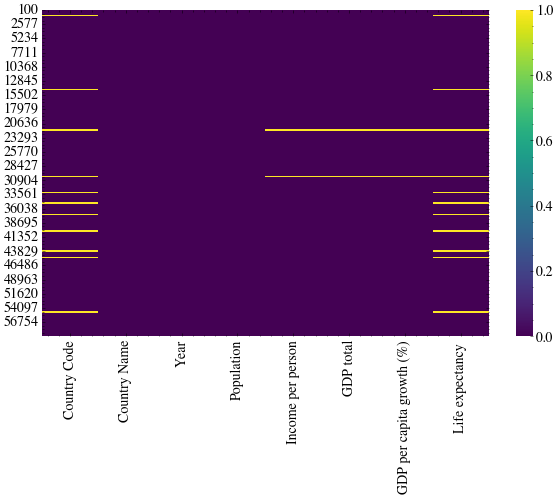

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap = "viridis");

In [23]:
df.isnull().sum().sort_values(ascending = False)

Country Code                 1187
Life expectancy              1187
Income per person             242
GDP total                     242
GDP per capita growth (%)     242
Country Name                    0
Year                            0
Population                      0
dtype: int64

In [24]:
df["Country Code"].value_counts()

afg    121
png    121
nld    121
nzl    121
nic    121
      ... 
gtm    121
gin    121
mhl     48
and     48
dma     48
Name: Country Code, Length: 189, dtype: int64

In [25]:
df["Country Name"].value_counts()

Afghanistan      121
Nepal            121
New Zealand      121
Nicaragua        121
Niger            121
                ... 
Guinea           121
Guinea-Bissau    121
Guyana           121
Haiti            121
Zimbabwe         121
Name: Country Name, Length: 197, dtype: int64

In [26]:
def plot_distribution(data, plot_title = None, bin_value = 100, width = 0.9, colors = ("r","y","g"), lw = 2 ):
    """
    Function to plot the distribution of data
    """
    data.hist(bins = bin_value, rwidth = width)
    plt.axvline(data.mean(), color = colors[0], lw = lw)
    plt.axvline(data.median(), color = colors[1], lw = lw)
    plt.axvline(data.mode()[0], color = colors[2], lw = lw)
    plt.title(plot_title, fontsize = 18)

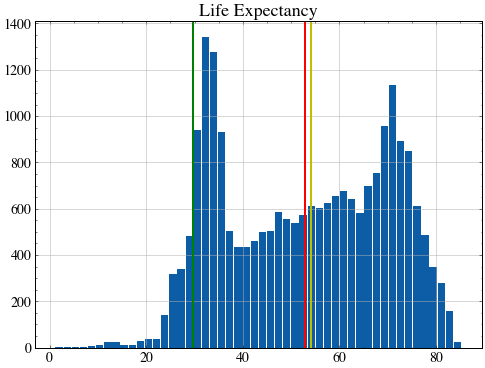

In [27]:
plot_distribution(df["Life expectancy "], plot_title= "Life Expectancy", bin_value= 50)

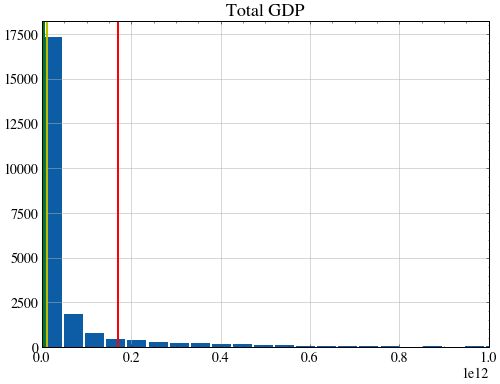

In [28]:
plot_distribution(df["GDP total"], plot_title= "Total GDP",bin_value= 500)
plt.xlim([0,1e12]);

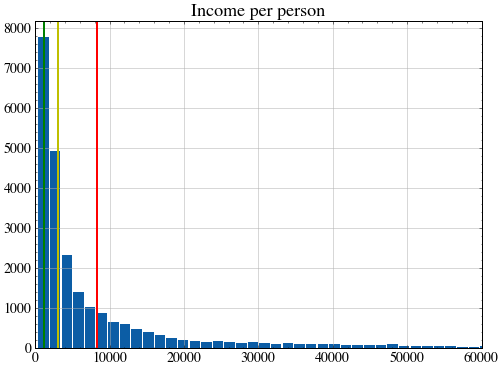

In [29]:
plot_distribution(df["Income per person"], plot_title="Income per person")
plt.xlim([0,60000]);

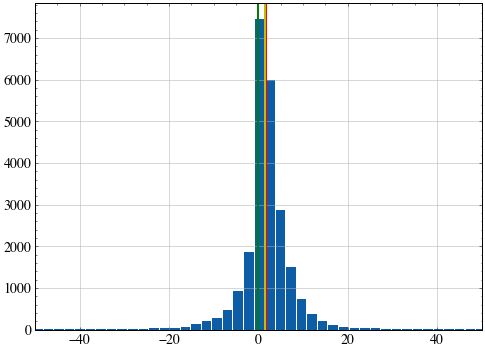

In [30]:
# GDP per capita growth (%) : mean
plot_distribution(df["GDP per capita growth (%)"])
plt.xlim([-50,50]);

In [31]:
# Fill missing values

In [32]:
# Life expectancy: mean
# GDP per capita growth (%) : mean
# "GDP total": median
# "Income per person": median
fill_mean_columns = ["Life expectancy ","GDP per capita growth (%)"]
fill_median_columns = ["GDP total", "Income per person"]
for col in fill_mean_columns:
    df[col].fillna(value = df[col].mean(), inplace = True)
for col in fill_median_columns:
    df[col].fillna(value = df[col].median(), inplace = True)

In [33]:
df.isnull().sum().sort_values(ascending = False)

Country Code                 1187
Country Name                    0
Year                            0
Population                      0
Income per person               0
GDP total                       0
GDP per capita growth (%)       0
Life expectancy                 0
dtype: int64

In [34]:
# Drop country code
df.drop("Country Code", axis = 1, inplace= True)

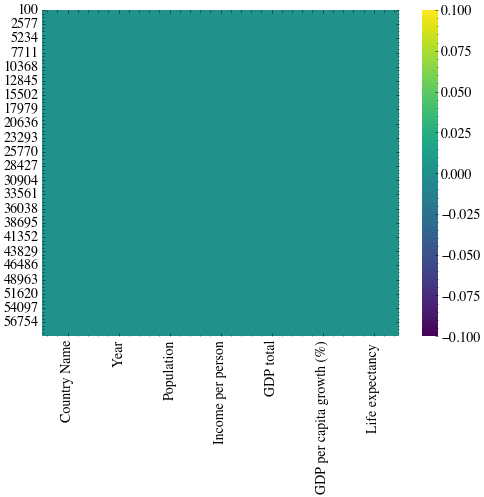

In [35]:
sns.heatmap(df.isnull(), cmap = "viridis");

### Save the preprocessed data

In [36]:
# Save this data frame
data_path = "./data/cleaned-data/"
df.to_csv(data_path + "Cleaned data(1900-2020).csv", index = False)

In [37]:
# Load data
loadedDf = pd.read_csv(data_path + "Cleaned data(1900-2020).csv")
loadedDf.head()

,Country Name,Year,Population,Income per person,GDP total,GDP per capita growth (%),Life expectancy
0,Afghanistan,1900,4832414,1041.0,5.031623e+09,0.88,29.41
1,Afghanistan,1901,4879685,1050.0,5.125766e+09,0.73,29.47
2,Afghanistan,1902,4935122,1058.0,5.221908e+09,0.83,29.53
3,Afghanistan,1903,4998861,1067.0,5.333342e+09,0.81,29.60
4,Afghanistan,1904,5063419,1076.0,5.445747e+09,0.78,29.66


# Part I: Understand population change

###  How did the world population change over time? Visualize the trend.
- I am interested in the current World population change. I will analysis and visualize the trend

In [38]:
select_cols = ["Year", "Country Name", "Population"]
popGroupbyYear = loadedDf[select_cols].groupby("Year").sum()

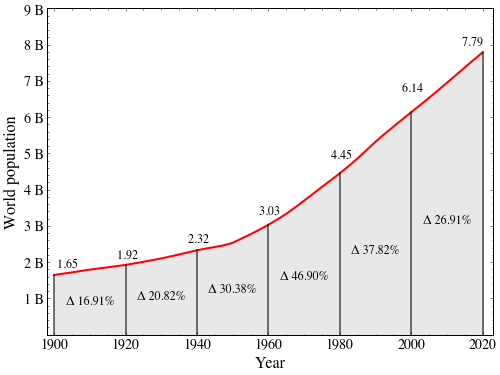

In [39]:
# Visualize the population change
x = popGroupbyYear.index
y = popGroupbyYear["Population"]

fig, ax = plt.subplots()
ax.plot(x, y, "r-", lw = 2)
ax.fill_between(x, 0, y, color = "lightgray", alpha = 0.5)

for x in range(1900,2040,20):
    y_vline = popGroupbyYear[popGroupbyYear.index == x]["Population"]
    plt.plot((x,x),(0, y_vline), color = "black", lw = 1.5, alpha = 0.7) 

fac = 1e9
for x in range(1900,2040,20):
    y_pos = popGroupbyYear[popGroupbyYear.index == x]["Population"].values[0]
    y_pos_text = y_pos / fac
    upperPlus = y_pos / 11
    
    if (x != 2020) & (x != 1900):
        plt.text(x, y_pos + upperPlus, s = f"{y_pos_text: .2f}", \
                 horizontalalignment='center', fontsize = 12)
    elif x == 2020:
        plt.text(x, y_pos + 0.2e9, s = f"{y_pos_text: .2f}", horizontalalignment='right',fontsize = 12)
    else: 
        plt.text(x, y_pos + 0.2e9, s = f"{y_pos_text: .2f}", fontsize = 12)

for x in range(1900,2040,20):
    if x != 2020:
        y2 = popGroupbyYear[popGroupbyYear.index == (x+20)]["Population"].values[0]
        y1 = popGroupbyYear[popGroupbyYear.index == x]["Population"].values[0]
        per = (y2 - y1) / y1
        plt.text(x + 10, y1/2, s = ( "Δ" + f"{per * 100: .2f}" + "%"),horizontalalignment='center', fontsize = 12)
        
# Custom y axis to show the Billion
def billions(x, pos):
    return '%1.f B' % (x * 1e-9)
formatter = FuncFormatter(billions)
ax.yaxis.set_major_formatter(formatter)

plt.xlim([1898,2023])
plt.ylim([100,9e9])
plt.xlabel("Year")
plt.ylabel("World population");

# Save figure
plt.savefig('figure/World-population-change.png', dpi = 600, pad_inches = .1, bbox_inches = 'tight')

**Observation**
- The world population has experienced continuous growth. The world population increased from 1.6 billion in 1900 to 7.79 billion 2020. 

### 5 country with the highest increase over the time

In [40]:
# Groupby country and year
select_cols = ["Year", "Country Name", "Population"]
popByCountry = loadedDf[select_cols].groupby(["Country Name","Year"]).sum().reset_index()

In [41]:
year1 = popByCountry[popByCountry["Year"] == 1900].drop("Year", axis = 1).reset_index(drop=True)
year2 = popByCountry[popByCountry["Year"] == 2020].drop("Year", axis = 1).reset_index(drop=True)

In [42]:
# Compute the change of population between 1900 and 2020
change_value = year2["Population"] - year1["Population"]
incre_per = (change_value / year1["Population"]) * 100
year2["Population increase (Billion)"] = np.round((change_value) * 1e-9, 6)
year2["Increase (%)"] = np.round(incre_per, 2)

In [43]:
year2.sort_values("Population increase (Billion)", ascending = False)\
                [["Country Name","Population increase (Billion)","Increase (%)"]].head()

,Country Name,Population increase (Billion),Increase (%)
77,India,1.088025,372.64
35,China,1.037744,258.42
188,United States,0.252239,320.25
78,Indonesia,0.235354,616.60
131,Pakistan,0.202684,1113.15


**Observation**
- India, China, US, Indonesia, Pakistan have the highest increase of population over the time

### 5 country with the lowest increase over the time

In [44]:
year2.sort_values("Population increase (Billion)")\
                [["Country Name","Population increase (Billion)","Increase (%)"]].head()

,Country Name,Population increase (Billion),Increase (%)
93,Latvia,-0.000266,-12.35
72,Holy See,-0.000000,-11.10
163,St. Kitts and Nevis,0.000006,12.52
183,Tuvalu,0.000008,221.92
121,Nauru,0.000009,454.74


**Observation**
- Latvia, Holy See, St. Kitts and Nevis, Tuvalu, Nauru have the lowest increase of population over the time
- These countries are very small countries and unwell known

### The change of Vietnam, and Japan population and visualize the trend
- I am Vietnamese people who is living in Japan, therefore I am interested in the change of Vietnam and Japan population

In [45]:
# Extract information of Vietnam and Japan
vietnam_pop = popByCountry[popByCountry["Country Name"]== "Vietnam"]
japan_pop = popByCountry[popByCountry["Country Name"]== "Japan"]

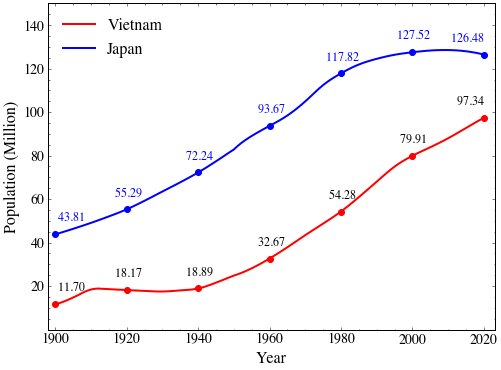

In [46]:
# Visualize the trend
x = vietnam_pop["Year"]
y1 = vietnam_pop["Population"]
y2 = japan_pop["Population"]

fig, ax = plt.subplots()
ax.plot(x, y1, "r-", lw = 2, label = "Vietnam")
ax.plot(x, y2, "b-", lw = 2, label = "Japan")

# Draw change of Vietnam
fac = 1e6
for x in range(1900,2040,20):
    y_pos = vietnam_pop[vietnam_pop["Year"] == x]["Population"].values[0]
    y_pos_text = y_pos / fac
    upperPlus = 0.06e8
    
    if (x != 2020) & (x != 1900):
        plt.text(x, y_pos + upperPlus, s = f"{y_pos_text: .2f}", \
                 horizontalalignment='center', fontsize = 12)
    elif x == 2020:
        plt.text(x, y_pos + upperPlus, s = f"{y_pos_text: .2f}", horizontalalignment='right',fontsize = 12)
    else: 
        plt.text(x, y_pos + upperPlus, s = f"{y_pos_text: .2f}", fontsize = 12)
for x in range(1900,2040,20):
    y_val = vietnam_pop[vietnam_pop["Year"] == x]["Population"]
    plt.plot(x, y_val, "ro", markersize = 6)

# Draw change of Japan
for x in range(1900,2040,20):
    y_pos = japan_pop[japan_pop["Year"] == x]["Population"].values[0]
    y_pos_text = y_pos / fac
    upperPlus = 0.06e8
    
    if (x != 2020) & (x != 1900):
        plt.text(x, y_pos + upperPlus, s = f"{y_pos_text: .2f}", \
                 horizontalalignment='center', fontsize = 12, color = "blue")
    elif x == 2020:
        plt.text(x, y_pos + upperPlus, s = f"{y_pos_text: .2f}", horizontalalignment='right',fontsize = 12,color = "blue")
    else: 
        plt.text(x, y_pos + upperPlus, s = f"{y_pos_text: .2f}", fontsize = 12,color = "blue")

for x in range(1900,2040,20):
    y_val = japan_pop[japan_pop["Year"] == x]["Population"]
    plt.plot(x, y_val, "bo", markersize = 6)

# Custion ylabel
def million(x, pos):
    return '%1.f' % (x * 1e-6)
formatter = FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)

plt.xlim([1898,2023])
plt.ylim([100,1.5e8])
plt.xlabel("Year")
plt.ylabel("Population (Million)")
plt.legend(fontsize = 16, loc = "upper left");

#save figure
plt.savefig('figure/Vietnam-Japan-population-change.png', dpi = 600, pad_inches = .1, bbox_inches = 'tight')

**Observation**
- Before the 1980s, both Japan and Vietnam had similar population growth rates. While the population in Vietnam will continue to increase steadily until 2020, Japan's population tends to increase slowly and gradually decrease. Especially the continuous population decline from 2000 to 2020.

# Part II: Understand GDP change

In [47]:
gdpGroupbyCountry = gdp.groupby("Country Name").mean()

NameError: name 'gdp' is not defined

## How did the total GDP of "Vietnam", "Japan", "United States", "China" change over time?

In [48]:
select_cols = ["Year", "Country Name", "GDP total","GDP per capita growth (%)"]
gdp = loadedDf[select_cols]

In [49]:
gdp.head()

,Year,Country Name,GDP total,GDP per capita growth (%)
0,1900,Afghanistan,5.031623e+09,0.88
1,1901,Afghanistan,5.125766e+09,0.73
2,1902,Afghanistan,5.221908e+09,0.83
3,1903,Afghanistan,5.333342e+09,0.81
4,1904,Afghanistan,5.445747e+09,0.78


In [50]:
# vietnam_gdp  = gdp[gdp["Country Name"] == "Vietnam"].iloc[::10]
# japan_gdp = gdp[gdp["Country Name"] == "Japan"].iloc[::10]
# usa_gdp = gdp[gdp["Country Name"] == "United States"].iloc[::10]
# china_gdp = gdp[gdp["Country Name"] == "China"].iloc[::10]

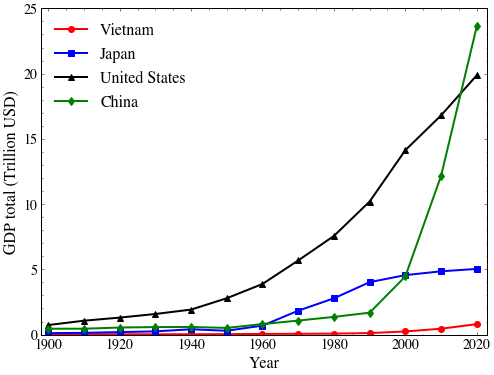

In [51]:
# Select only four countries which I am interested in
countries = ["Vietnam", "Japan", "United States", "China"]
styles = ["ro-", "bs-", "k^-", "gd-"]

fig, ax = plt.subplots()

for country, style in zip(countries, styles):
    data = gdp[gdp["Country Name"] == country].iloc[::10]
    x = data["Year"]
    y = data["GDP total"]
    ax.plot(x, y, style, lw = 2, label = country)

def trillion(x, pos):
    return '%1.f' % (x * 1e-12)
formatter = FuncFormatter(trillion)
ax.yaxis.set_major_formatter(formatter)

plt.xlim([1898,2023])
plt.ylim([1000,2.5e13])
plt.xlabel("Year")
plt.ylabel("GDP total (Trillion USD)")
plt.legend(fontsize = 16, loc = "upper left");

plt.savefig('figure/GDP-change-VN-JP-US-CN.png', dpi = 600, pad_inches = .1, bbox_inches = 'tight')

**Observation**
- Vietnam's GDP has maintained a very slow growth rate from 1990 to 2020. Japan and China tend to increase quite strongly in the period after 1960. Although it has always had a lower GDP than Japan during the previous period, China's GPD caught up and equaled Japan's GDP in 2000 before surpassed Japan many times in the period 2000-2020. The US has a GDP that has always been at a steady and high rate compared to other countries, but has been behind China since 2012-2020.

## How did the GDP growth rate in Vietnam, Japan, and USA change over time?

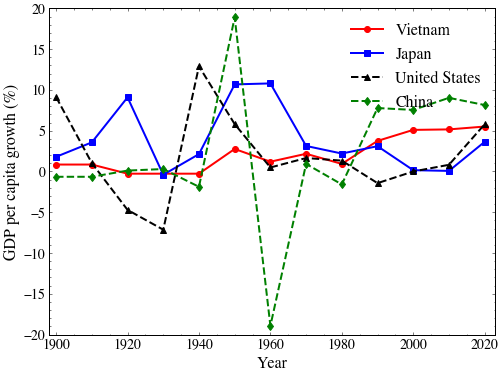

In [52]:
countries = ["Vietnam", "Japan", "United States", "China"]
styles = ["ro-", "bs-", "k^--", "gd--"]

fig, ax = plt.subplots()

for country, style in zip(countries, styles):
    data = gdp[gdp["Country Name"] == country].iloc[::10]
    x = data["Year"]
    y = data["GDP per capita growth (%)"]
    ax.plot(x, y, style, lw = 2, label = country)
    
ax.legend(fontsize = 16, loc = "upper right")

plt.xlim([1898,2023])
plt.ylim([-20,20])
plt.xlabel("Year")
plt.ylabel("GDP per capita growth (%)")

plt.savefig('figure/GDP-growth-rate-VN-JP-US-CN.png', dpi = 600, pad_inches = .1, bbox_inches = 'tight')
plt.show()

**Observation**
- The variation of China's GDP growth rate is the largest. The largest difference was observed in 1940-1960. From 1980 to 2000, we can observe the significant growth of China economy.
- The second highest is the US and Vietnam.
- 

# Part III: Understand life expectancy and income

## The income and life expectancy change of Vietnam, Japan, America

In [53]:
condition = loadedDf["Country Name"].str.lower().str.contains("united states")
loadedDf[condition].head()

,Country Name,Year,Population,Income per person,GDP total,GDP per capita growth (%),Life expectancy
22627,United States,1900,78763706,9244.0,7.281283e+11,9.12,48.95
22628,United States,1901,80336086,10087.0,8.103734e+11,-0.98,49.32
22629,United States,1902,81949920,9988.0,8.185340e+11,2.96,50.52
22630,United States,1903,83606240,10284.0,8.598024e+11,-3.11,50.63
22631,United States,1904,85296008,9965.0,8.499375e+11,5.28,49.63


In [54]:
# data
x = loadedDf[loadedDf["Country Name"] == "Vietnam"]["Year"].iloc[::20]
y1 = loadedDf[loadedDf["Country Name"] == "Vietnam"]["Income per person"].iloc[::20]
y2 = loadedDf[loadedDf["Country Name"] == "Japan"]["Income per person"].iloc[::20]
y3 = loadedDf[loadedDf["Country Name"] == "United States"]["Income per person"].iloc[::20]

twiny1 = loadedDf[loadedDf["Country Name"] == "Vietnam"]["Life expectancy "].iloc[::20]
twiny2 = loadedDf[loadedDf["Country Name"] == "Japan"]["Life expectancy "].iloc[::20]
twiny3 = loadedDf[loadedDf["Country Name"] == "United States"]["Life expectancy "].iloc[::20]

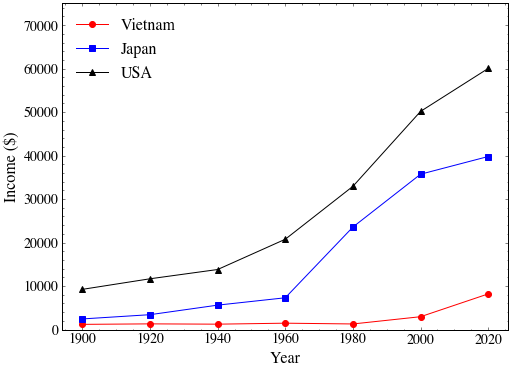

In [55]:
fig, ax1 = plt.subplots()

ax1.plot(x, y1, "ro-", label = "Vietnam")
ax1.plot(x, y2, "bs-", label = "Japan")
ax1.plot(x, y3, "k^-", label = "USA")

ax1.set_xlabel("Year")
ax1.set_ylabel("Income ($)")

ax1.legend(fontsize = 16, loc = "upper left")

ax1.set_ylim([0,75000])
plt.show()

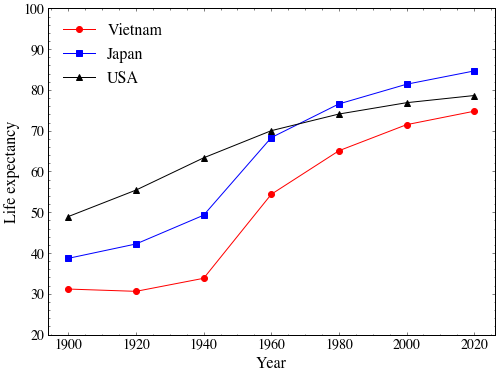

In [56]:
# Life expectancy
fig, ax2 = plt.subplots()

ax2.plot(x, twiny1, "ro-", label = "Vietnam")
ax2.plot(x, twiny2, "bs-", label = "Japan")
ax2.plot(x, twiny3, "k^-", label = "USA")

ax2.set_xlabel("Year")
ax2.set_ylabel("Life expectancy")

ax2.legend(fontsize = 16, loc = "upper left")

ax2.set_ylim([20,100])
plt.show()

## Is the life expectancy related to the income? Visualize the correlation in 1900 and 2020.
## Position of Vietnam, Japan, USA and the country with the highest income in the graph

In [57]:
#get the alpha_2 code of "Germany"
pycountry.countries.lookup("Vietnam").alpha_2

'VN'

In [58]:
#get the continent cide to the alpha_2 code
pycountry_convert.convert_country_alpha2_to_continent_code.COUNTRY_ALPHA2_TO_CONTINENT_CODE[
    pycountry.countries.lookup("Vietnam").alpha_2]

'AS'

In [59]:
def find_continent(column):
    """
    returns the continent or error to the given country
    """
    try:
        continent = pycountry_convert.convert_country_alpha2_to_continent_code.COUNTRY_ALPHA2_TO_CONTINENT_CODE[
        pycountry.countries.lookup(column).alpha_2]
    except: 
        continent = "Error"
        
    return continent

In [60]:
df2020 = loadedDf[loadedDf["Year"] == 2020]
df2020.head()

,Country Name,Year,Population,Income per person,GDP total,GDP per capita growth (%),Life expectancy
120,Afghanistan,2020,38928341,1918.0,7.465203e+10,1.66,64.410000
241,Albania,2020,2877800,13265.0,3.817363e+10,5.17,78.580000
362,Algeria,2020,43851043,10624.0,4.658901e+11,1.04,78.310000
483,Andorra,2020,77265,61605.0,4.759876e+09,3.41,52.932645
604,Angola,2020,32866268,6219.0,2.043835e+11,-2.55,65.360000


In [61]:
df2020["continent"] = df2020["Country Name"].apply(find_continent)

In [62]:
df2020.head()

,Country Name,Year,Population,Income per person,GDP total,GDP per capita growth (%),Life expectancy,continent
120,Afghanistan,2020,38928341,1918.0,7.465203e+10,1.66,64.410000,AS
241,Albania,2020,2877800,13265.0,3.817363e+10,5.17,78.580000,EU
362,Algeria,2020,43851043,10624.0,4.658901e+11,1.04,78.310000,AF
483,Andorra,2020,77265,61605.0,4.759876e+09,3.41,52.932645,EU
604,Angola,2020,32866268,6219.0,2.043835e+11,-2.55,65.360000,AF


In [63]:
df2020[df2020.continent == "Error"]["Country Name"].value_counts()

Brunei                            1
Cape Verde                        1
Timor-Leste                       1
Syria                             1
Swaziland                         1
St. Vincent and the Grenadines    1
St. Lucia                         1
St. Kitts and Nevis               1
Russia                            1
Micronesia, Fed. Sts.             1
Macedonia, FYR                    1
South Korea                       1
North Korea                       1
Iran                              1
Hong Kong, China                  1
Holy See                          1
Cote d'Ivoire                     1
Congo, Rep.                       1
Congo, Dem. Rep.                  1
Palestine                         1
Name: Country Name, dtype: int64

In [64]:
#create map for the missing countries
error_map = {
    "Brunei": "AS",
    "Cape Verde": "AF",
    "Timor-Leste": "AS",
    "Syria": "AS",
    "Swaziland": "AF",
    "St. Vincent and the Grenadines": "NA",
    "St. Lucia": "NA",
    "St. Kitts and Nevis": "NA",
    "Russia": "AS",
    "Micronesia, Fed. Sts.": "OC",
    "Macedonia, FYR": "EU",
    "South Korea": "AS",
    "North Korea": "AS",
    "Iran": "AS",    
    "Hong Kong, China": "AS",  
    "Holy See": "EU",
    "Cote d'Ivoire": "AF",
    "Congo, Rep.": "AF",    
    "Congo, Dem. Rep.": "AF",
    "Palestine": "AS"
            }

In [65]:
#add the missing countries manually
for country in list(error_map.keys()):
    print(country)
    df2020.loc[df2020[df2020["Country Name"] == country].index, "continent"] = error_map[country]

Brunei
Cape Verde
Timor-Leste
Syria
Swaziland
St. Vincent and the Grenadines
St. Lucia
St. Kitts and Nevis
Russia
Micronesia, Fed. Sts.
Macedonia, FYR
South Korea
North Korea
Iran
Hong Kong, China
Holy See
Cote d'Ivoire
Congo, Rep.
Congo, Dem. Rep.
Palestine


In [66]:
df2020[df2020.continent == "Error"]

,Country Name,Year,Population,Income per person,GDP total,GDP per capita growth (%),Life expectancy,continent


In [67]:
df2020["continent"].unique()

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

In [68]:
#create a color map for the scatter plot
color_map = {
    "AS": '#f4a742', #orange -> Asia
    "EU": '#20d82f', #green -> Europe
    "AF": '#20d8d8', #light 'blue -> Africa
    "NA": '#f2ff00', #yellow -> North America
    "SA": '#013384', #darker blue -> South and Central America
    "OC": '#d64242'  #red -> Oceania
}

In [69]:
#add the colors to the continents
df2020["color"] = df2020.continent.apply(lambda x: color_map[x])

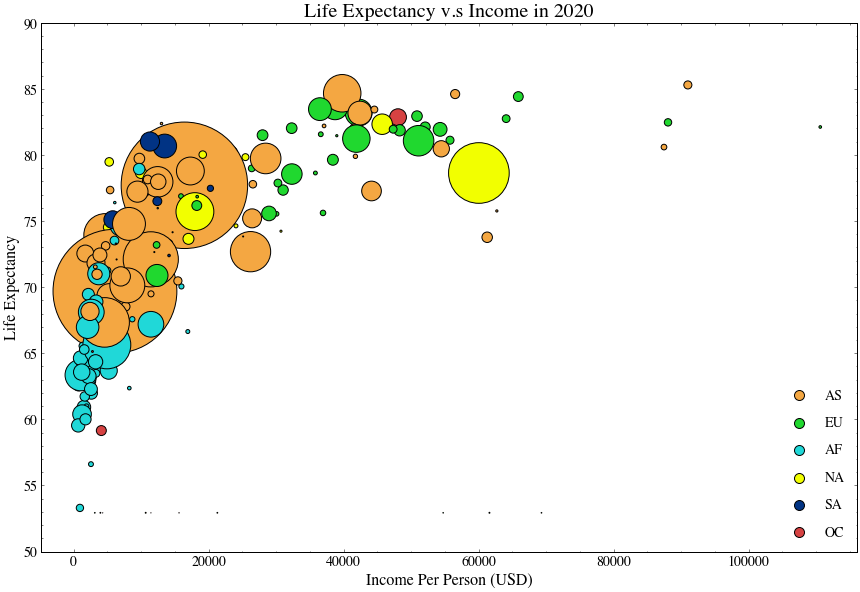

In [70]:
#create the scatter plot
fig, ax = plt.subplots(figsize = (12,8))

x = df2020["Income per person"]
y = df2020["Life expectancy "]
color = np.array(df2020["color"])
size = df2020["Population"]

#plot the scatterpoints, the size is reduced by a factor for a cleaner plot
plt.scatter(x = x, y = y, s=size/90000, c = color, edgecolors = "black", label = None)


#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
for continent in list(df2020.continent.unique()):
    plt.scatter([], [], c=color_map[continent], alpha=1, label=str(continent), s = 100, edgecolors = "black")
    
legend1 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='')
plt.tight_layout()


ax.set_ylabel(f"Life Expectancy")
ax.set_xlabel("Income Per Person (USD)")
ax.set_title(f"Life Expectancy v.s Income in 2020", fontsize = 20)
ax.set_ylim(50,90)

#save figure
plt.savefig('figure/life-expectancy-vs-income0-in-2020.png', dpi = 600, pad_inches = .1, bbox_inches = 'tight')

In [71]:
df2020[["Life expectancy ", "Income per person"]].corr().iloc[0,1]

0.5176509877005826

In [72]:
df2020[df2020["Income per person"] == df2020["Income per person"].max()]

,Country Name,Year,Population,Income per person,GDP total,GDP per capita growth (%),Life expectancy,continent,color
12462,Luxembourg,2020,625976,110621.0,6.924586e+10,2.15,82.11,EU,#20d82f


In [73]:
posVN1 = df2020[df2020["Country Name"] == "Vietnam"]["Income per person"].values[0]
posVN2 = df2020[df2020["Country Name"] == "Vietnam"]["Life expectancy "].values[0]

posJP1 = df2020[df2020["Country Name"] == "Japan"]["Income per person"].values[0]
posJP2 = df2020[df2020["Country Name"] == "Japan"]["Life expectancy "].values[0]

posUSA1 = df2020[df2020["Country Name"] == "United States"]["Income per person"].values[0]
posUSA2 = df2020[df2020["Country Name"] == "United States"]["Life expectancy "].values[0]

posLXB1 = df2020[df2020["Country Name"] == "Luxembourg"]["Income per person"].values[0]
posLXB2 = df2020[df2020["Country Name"] == "Luxembourg"]["Life expectancy "].values[0]

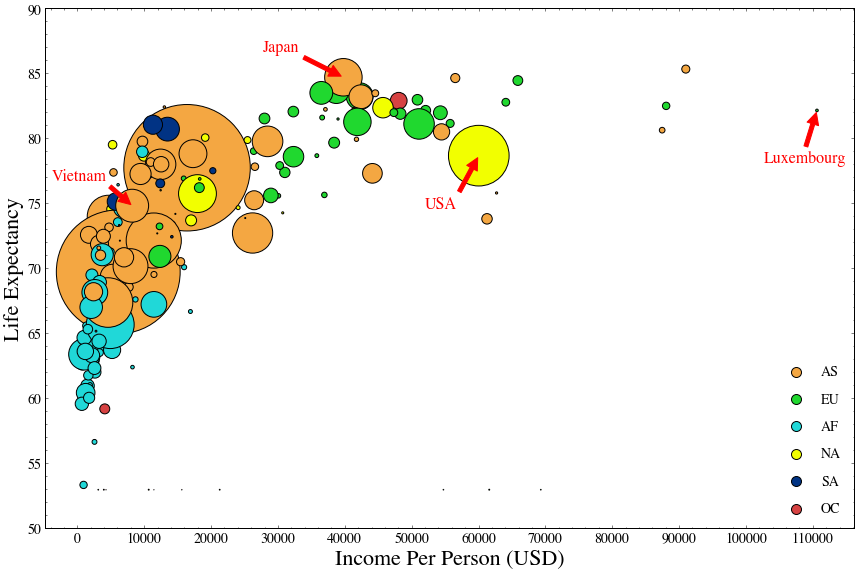

In [74]:
#create the scatter plot
fig, ax = plt.subplots(figsize = (12,8))

x = df2020["Income per person"]
y = df2020["Life expectancy "]
color = np.array(df2020["color"])
size = df2020["Population"]


#plot the scatterpoints, the size is reduced by a factor for a cleaner plot
plt.scatter(x = x, y = y, s=size/90000, c = color, edgecolors = "black", label = None)

# Position
ax.annotate("Vietnam", xy = (posVN1, posVN2), xytext=(posVN1 - 12000, posVN2 + 2), color = "red",
           arrowprops=dict(color='red', shrink=0.05), fontsize = 16)

ax.annotate("Japan", xy = (posJP1, posJP2), xytext=(posJP1 - 12000, posJP2 + 2), color = "red",
           arrowprops=dict(color='red', shrink=0.05), fontsize = 16)

ax.annotate("USA", xy = (posUSA1, posUSA2), xytext=(posUSA1 - 8000, posUSA2 - 4), color = "red",
           arrowprops=dict(color='red', shrink=0.05), fontsize = 16)

ax.annotate("Luxembourg", xy = (posLXB1, posLXB2), xytext=(posLXB1 - 8000, posLXB2 - 4), color = "red",
           arrowprops=dict(color='red', shrink=0.05), fontsize = 16)

#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
for continent in list(df2020.continent.unique()):
    plt.scatter([], [], c=color_map[continent], alpha=1, label=str(continent), s = 100, edgecolors = "black")
    
legend1 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='')
plt.tight_layout()

ax.set_ylabel(f"Life Expectancy", fontsize = 22)
ax.set_xlabel("Income Per Person (USD)",fontsize = 22)
# ax.set_title(f"Life Expectancy v.s Income in 2020", fontsize = 24)
ax.set_ylim(50,90)
ax.set_xticks(np.arange(0,120000,10000))

#save figure
plt.savefig('figure/Life-expectancy-and-income-2020-with-countries.png', dpi = 800, pad_inches = .1, bbox_inches = 'tight')